###### Question 1:
Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]


###### Ans:

#### Introduction
Enron was one of the largest companies in the united states before 2002. After that it had collapsed into bankruptcy due to widespread corporate fraud. The aim of the algorithm is to predict the status of Enron employees as poi or non-poi. Poi means Person of Interest, i.e. a person involved in the Enron scandal. 
non-poi means  i.e person  not involved in the Enron scandal.

This data is taken from the Enron dataset provided in the Udacity course.

#### The goal of the project:
To go through the following processes:
* Data exploration:
Understanding, examining, visualizing and cleaning the data. Learning the data through the above steps and repeat the steps if necessary.
Once the data exploration is done, it is ready for feature selection/engineering.
* Feature selection/engineering:
Selecting the features manually(using human intuition) or automated. Create new features and get better results than the existing features.
* Selecting an Algorithm
Selecting one of the algorithms from many available algorithms. Ex: Naive Bayes, SVM etc
* Tuning one of the supervised machine learning algorithm:
Validating the algorithm to get the accurate prediction.

As machine learning is very good at finding the relationship between variables,
i.e features like poi's relation with salary and bonus etc are examined.
This project is a binary classification problem.

The Enron dataset in this project is a dictionary. The key-value pair in the dictionary corresponds to one person. The key in the dictionary is the person’s name and the value is another dictionary, which contains the names of all the features and their values for that person. 
* The features are divided into three types:
    * Financial features
    * Email features 
    * POI labels
In this dataset POI label is the target feature (that we want to predict). The remaining features are input features. So here we are trying to find the relationship between the target feature and the input features using machine learning algorithms.

The Enron dataset has 146 records with 14 financial features, 6 email features, and 1 labeled feature (POI). Out of the 146 records, 18 were labeled as persons of interest.

###### Outliers
I have used Seaborn’s pair plot which shows the distribution of the variables and a scatter plot representation to understand the data and outliers.

Scatter plot of Salary vs Bonus to understand the data and outliers.

TOTAL: This was an extreme outlier and it was likely a spreadsheet artifact.

Also plotted the two aggregated variables. Total Payments and Total Stock Value.
It looks like negative values are also there. I have used different ways to remove them and documented in the Ipynb file.

THE TRAVEL AGENCY IN THE PARK: This record did not represent any person. It's a travel agency. So I removed.

###### Financial Features
* Salary:
* A fixed regular payment, typically paid on a monthly or biweekly basis but often expressed as an annual sum, made by an employer to an employee, especially a professional or white-collar worker.

* Bonus:
* The bonus is the extra payment which is received as a reward for doing one’s job well. It usually comes along with the salary of the employee. It is the gesture of appreciation from the organization towards their employees.

* Long-Term Incentive
* Reflects long-term incentive cash payments from various long-term incentive programs designed to tie executive compensation to long-term success as measured against key performance drivers and business objectives over a multi-year period, generally 3 to 5 years

* Deferred income
* Reflects voluntary executive deferrals of salary, annual cash incentives, and long-term cash incentives as well as cash fees deferred by non-employee directors under a deferred compensation arrangement.  May also reflect deferrals under a stock option or phantom stock unit in lieu of cash arrangement.  

* Deferral Payments:
* Reflects distributions from a deferred compensation arrangement due to termination of employment or due to in-service withdrawals as per plan provisions.

* Loan Advances
* Reflects the total amount of loan advances, excluding repayments, provided by the Debtor in return for a promise of repayment. In certain instances, the terms of the promissory notes allow for the option to repay with the stock of the company.

* Other
* Reflects items such as payments for severance, consulting services, relocation costs, tax advances and allowances for employees on international assignment (i.e. housing allowances, cost of living allowances, payments under Enron’s Tax Equalization Program, etc.).  May also include payments provided with respect to employment agreements, as well as imputed income amounts for such things as use of corporate aircraft.

* Expenses
* Reflects reimbursements of business expenses.  May include fees paid for consulting services. 

* Director Fees
*  Reflects cash payments and/or value of stock grants made in lieu of cash payments to non-employee directors.

* Total Payments	
* Sum of the above values

#### Financial features related to stocks


* Exercised Stock Options
* Reflects amounts from exercised stock options which equal the market value in excess of the exercise price on the date the options were exercised either through cashless (same-day sale), stock swap or cash exercises.  The reflected gain may differ from that realized by the insider due to fluctuations in the market price and the timing of any subsequent sale of the securities.

* Restricted Stock
* Reflects the gross fair market value of shares and accrued dividends (and/or phantom units and dividend equivalents) on the date of release due to the lapse of vesting periods, regardless of whether deferred.

* Restricted StockDeferred
* Reflects value of restricted stock voluntarily deferred prior to release under a deferred compensation arrangement.

* Total Stock Value
* Sum of the above values

#### Email Features

* to_messages
* Total number of emails received (person’s inbox)

* email_address
* Email address of the person

* from_poi_to_this_person
* Number of emails received by POIs

* from_messages
* Total number of emails sent by this person

* from_this_person_to_poi
* Number of emails sent by this person to a POI.

* shared_receipt_with_ poi
* Number of emails addressed by someone else to a POI where this person was CC

#### Import the Enron dataset 

Import the Enron dataset pickle file from the Udacity Machine Learning course.
Name the file as enron_data.

In [7]:
#To know the number of rows and columns
enrondata_df_tr.shape

(146, 21)

* There are total 146 rows and 21 columns
* There are 146 observations in total
* 21 variables in total

The features in the data fall into three major types, namely financial features, email features and POI labels.

financial features: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)

email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)

POI label: [‘poi’] (boolean, represented as integer)

14 financial features 
6 email features
1 POI label

In [16]:
print("Count of all values in the dataset: ", 146*21)

Count of all values in the dataset:  3066


In [17]:
print("Amount of NaN values in the dataset: ", enrondata_df_tr.isnull().sum().sum())

Amount of NaN values in the dataset:  1358


In [18]:
#to know the numper of poi
len(enrondata_df_tr[enrondata_df_tr['poi']])

18

In [19]:
# Allocation across classes (POI/non-POI)
poi_counts = defaultdict(int)
for features_values in data_dict.values():
    poi_counts[features_values['poi']] += 1
print('There are {} POIs and {} non-POIs.'.format(poi_counts[True], poi_counts[False]))

There are 18 POIs and 128 non-POIs.


Text(0,0.5,'Count of poi')

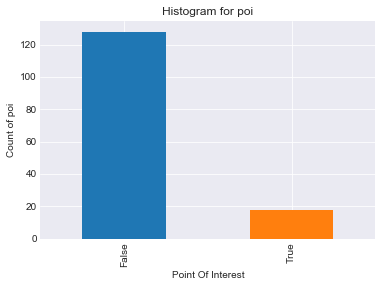

In [20]:
#Import pandas library
import pandas as pd
from pandas import Series, DataFrame
#Import numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Set style for all graphs
sns.set_style("darkgrid")
# To render plots inline
%matplotlib inline
#To visualize poi vs nonpoi in the whole data set
enrondata_df_tr['poi'].value_counts().plot(kind = 'bar')
plt.title("Histogram for poi")
plt.xlabel('Point Of Interest')
plt.ylabel('Count of poi')

18 POIs are there. Which are very important in our Analysis. Do not delete the POIs.
During data exploration if any outliers the Non POIs can be deleted.

18 POI’s are there

###### Outliers & Exploration
I have used Seaborn’s pair plot which shows the distribution of the variables and a scatter plot representation to understand the data and outliers.

Scatter plot of Salary vs Bonus to understand the data and outliers.

TOTAL: This was an extreme outlier and it was likely a spreadsheet artifact.

Also plotted the two aggregated variables. Total Payments and Total Stock Value.
It looks like negative values are also there. I have used different ways to remove them and documented in the Ipynb file.

THE TRAVEL AGENCY IN THE PARK: This record did not represent any person. It's a travel agency. So I removed.

In [24]:
# Check whoich row has all values missing
enrondata_df_tr[enrondata_df_tr.isnull().all(axis=1)]

,restricted_stock,bonus,long_term_incentive,restricted_stock_deferred,other,poi,from_this_person_to_poi,shared_receipt_with_poi,to_messages,total_stock_value,exercised_stock_options,loan_advances,total_payments,expenses,from_messages,deferral_payments,from_poi_to_this_person,deferred_income,salary,director_fees


LOCKHART EUGENE E” has all the values missing and will be removed

I will use Seaborn’s pair plot to understand the distribution of the variables and a scatter plot representation of them. Since the number of variables is too many to plot them all, I will use the 4 important ones.

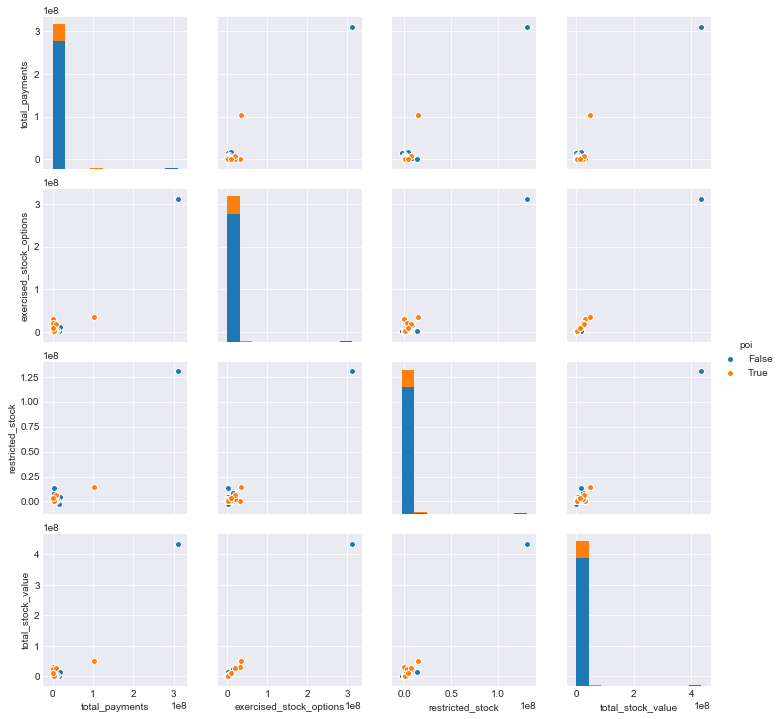

In [39]:
sns.pairplot(data=enrondata_df_tr, vars=["total_payments", "exercised_stock_options", "restricted_stock", "total_stock_value"], hue="poi")

Salary vs bonus using Scatter plot

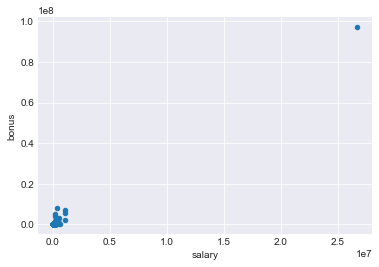

In [40]:
# Scatter plot of salary vs bonus
enrondata_df_tr.plot.scatter(x = 'salary', y = 'bonus')

There is a datapoint far away from the cluster of the rest. I will use the salary + bonus to find it

In [41]:
(enrondata_df_tr.salary + enrondata_df_tr.bonus).nlargest(2)

TOTAL              124047848.0
LAVORATO JOHN J      8339288.0
dtype: float64

In [42]:
enrondata_df_tr['salary'].idxmax()

'TOTAL'

Let's check the total_payments

In [43]:
enrondata_df_tr.total_payments.nlargest(2)

TOTAL            309886585.0
LAY KENNETH L    103559793.0
Name: total_payments, dtype: float64

The first one ‘TOTAL’, is the totals on the Payments Schedule and not a person so it should be removed.
The second one is not an outlier, it is just the huge payment and stock value of the CEO and chairman of Enron, Kenneth Lay. This is not an outlier. 

So it's total of all the employee salaries. So we have to remove it using drop.

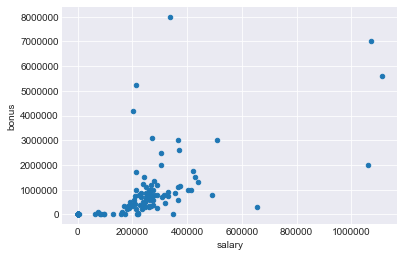

In [44]:
enrondata_df_tr.drop('TOTAL', inplace = True)
enrondata_df_tr.plot.scatter(x = 'salary', y = 'bonus')

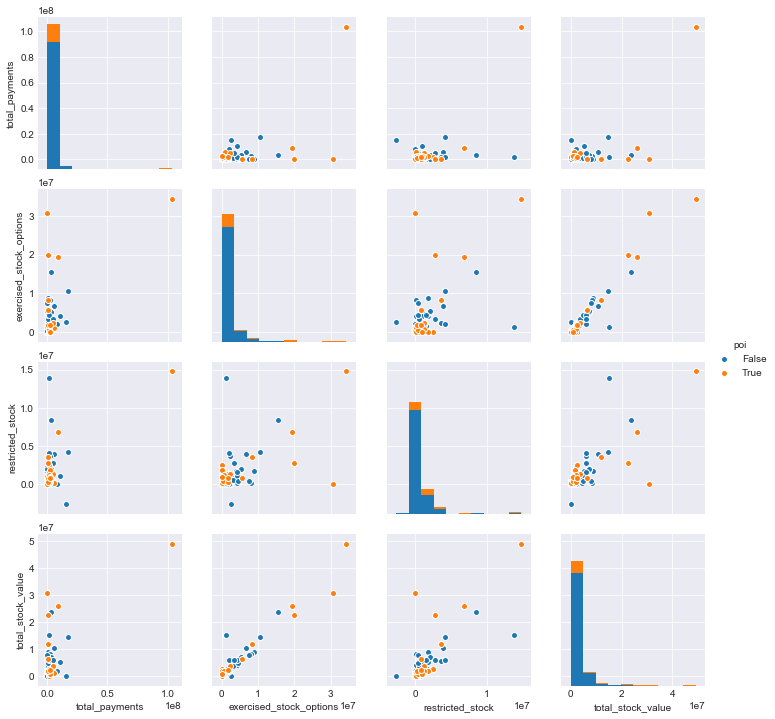

In [45]:
sns.pairplot(data=enrondata_df_tr, vars=["total_payments", "exercised_stock_options", "restricted_stock", "total_stock_value"], hue="poi")

After removing the “TOTAL” the scatter plots are little clear. We can notice a negative value for the restricted stock variable. So more outliers are present. We can check the sum of individual values with the totals of each category i.e total Payments, and total stock value.

Let us plot the two aggregated variables, Total Payments and Total Stock Value.

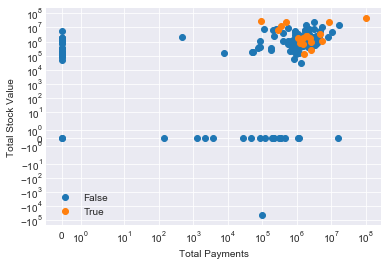

In [47]:
fig1, ax = plt.subplots()
for poi, data in enrondata_df_tr.groupby(by="poi"):
    ax.plot(data['total_payments'],data['total_stock_value'],'o', label=poi)
ax.legend()
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel("Total Payments")
plt.ylabel("Total Stock Value")

plt.show()

So negative values are there.

To investigate if there are more.

We can notice that the indexes/names in the dataset are in the form of Last name, First Name, Initial. Using regular expressions print the indexes that do not follow this pattern.

In [49]:
for index in enrondata_df_tr.index:
    if re.match('^[A-Z]+\s[A-Z]+(\s[A-Z])?$', index):
        continue
    else:
        print(index)

BLAKE JR. NORMAN P
BOWEN JR RAYMOND M
DERRICK JR. JAMES V
DONAHUE JR JEFFREY M
GARLAND C KEVIN
GLISAN JR BEN F
OVERDYKE JR JERE C
PEREIRA PAULO V. FERRAZ
SULLIVAN-SHAKLOVITZ COLLEEN
THE TRAVEL AGENCY IN THE PARK
WALLS JR ROBERT H
WHITE JR THOMAS E
WINOKUR JR. HERBERT S
YEAGER F SCOTT


There is a “suspicious” index. THE TRAVEL AGENCY IN THE PARK isn’t obviously a name of an employee.

In [50]:
enrondata_df_tr = enrondata_df_tr.drop(["THE TRAVEL AGENCY IN THE PARK"], axis=0)

Let us plot the two aggregated variables, Total Payments, and Total Stock Value.

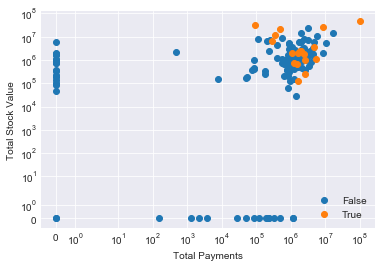

In [60]:
fig1, ax = plt.subplots()
for poi, data in enrondata_df_tr.groupby(by="poi"):
    ax.plot(data['total_payments'],data['total_stock_value'],'o', label=poi)
ax.legend()
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel("Total Payments")
plt.ylabel("Total Stock Value")

plt.show()

So the negative value is removed

In [87]:
for person in data_dict:
    if (data_dict[person]['salary'] =='NaN' and data_dict[person]['bonus'] =='NaN' and data_dict[person]['exercised_stock_options'] =='NaN' and data_dict[person]['long_term_incentive'] =='NaN' and data_dict[person]['total_payments'] =='NaN' and data_dict[person]['poi']== False):
        print(person)

CLINE KENNETH W
LOCKHART EUGENE E
POWERS WILLIAM
CHAN RONNIE
HAYSLETT RODERICK J
PIRO JIM


Above persons can be removed, As they are not POI.

In [88]:
enrondata_df_tr = enrondata_df_tr.drop(["POWERS WILLIAM"], axis=0)

In [89]:
enrondata_df_tr = enrondata_df_tr.drop(["CHAN RONNIE"], axis=0)

In [90]:
enrondata_df_tr = enrondata_df_tr.drop(["HAYSLETT RODERICK J"], axis=0)

In [91]:
enrondata_df_tr = enrondata_df_tr.drop(["PIRO JIM"], axis=0)

In [92]:
enrondata_df_tr = enrondata_df_tr.drop(["CLINE KENNETH W"], axis=0)

In [93]:
#Already removed
#enrondata_df_tr = enrondata_df_tr.drop(["LOCKHART EUGENE E"], axis=0)

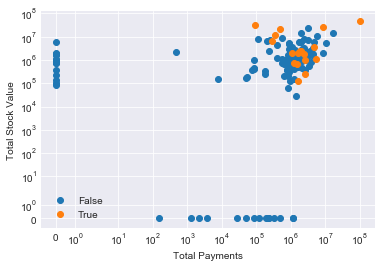

In [94]:
fig1, ax = plt.subplots()
for poi, data in enrondata_df_tr.groupby(by="poi"):
    ax.plot(data['total_payments'],data['total_stock_value'],'o', label=poi)
ax.legend()
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel("Total Payments")
plt.ylabel("Total Stock Value")

plt.show()

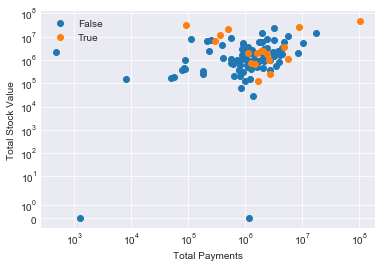

In [131]:
fig1, ax = plt.subplots()
for poi, data in enrondata_df_tr.groupby(by="poi"):
    ax.plot(data['total_payments'],data['total_stock_value'],'o', label=poi)
ax.legend()
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel("Total Payments")
plt.ylabel("Total Stock Value")

plt.show()

Still 3 or more outliers left. But the dataset is clear of many outliers. 

###### 2. What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]

###### Answer

There are many methods available for performing feature selection in machine learning. 
    
* Manual selection based on understanding, exploration & plots of data.

###### Manual selection
I have created 5 new features:

* perc_exercised_stock_options: the percentage of stock options from total stock value
* perc_salary: the percentage of salary from total payments
* perc_bonus: the percentage of bonus from total payments
* perc_from_poi: the percentage of emails the person received from a poi
* perc_to_poi: the percentage of emails the person sent to a poi

This was calculated by the following formulas:
* perc_salary = salary/total_payments
* perc_bonus = bonus/total_payments
* perc_exercised_stock_options = exercised_stock_options/total_stock_value
* perc_to_poi = from_this_person_to_poi / from_messages
* perc_from_poi = from_poi_to_this_person/ to_messages

After adding these 5 new features to our data, we now had a total of 25 features. Previously we used to have a very low number of poi 18 out of 128 nearly 14%. After removing outliers it improved a little bit. But still, have a low number of POI in the dataset (18 out of 90 nearly 20%).

Creating a model with all 25 features is ripe for overfitting. When a model has a larger number of features, there is bound to be more noise. If the model picks up the noise in the dataset when trained, it loses predictive power. So we need to reduce the number of features in the dataset, which in turn will reduce the potential for overfitting.

We already know that null data is present in our original dataset. To select the appropriate features. Out of 21 features, 80% of the dataset is approximate to 17 features. I have used pandas.DataFrame.dropna with parameter thresh = 16, to remove the rows with more than 16 null values. That means to keep any row with more than 16 non-null values.
#count_notnull_dataset = enron_data.dropna(thresh=16)

I have removed the following columns using drop:
* loan_advances                2 non-null float64()
* restricted_stock_deferred    5 non-null float64
* director_fees                0 non-null float64
* deferral_payments            14 non-null float64

So I chose 21 features (including “poi”) as the manually selected features_list.

selected_features_list:

['poi',
 'bonus',
 'shared_receipt_with_poi',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'other',
 'from_messages',
 'deferred_income',
 'long_term_incentive',
 'salary',
 'total_payments',
 'exercised_stock_options',
 'restricted_stock',
 'to_messages',
 'total_stock_value',
 'expenses',
 'perc_salary',
 'perc_bonus',
 'perc_exercised_stock_options',
 'perc_to_poi',
 'perc_from_poi']
 
Using the selected_features_list, the classifiers scores are documented in Ipynb file.



###### Importances method
Here I will modify the list of features to exclude those with an importance below a chosen threshold.

Below are the feature importances for the DecisionTree, AdaBoost Classifier, and RandomForest. I have compared the feature importances of the DecisionTree, AdaBoost and Random Forest classifiers. The values are completely different from one classifier to another classifier. So instead of manually selecting the features, I have tried to find the k value using Gridsearch and SelectKbest. Then I have used that k value with GridSearchCV in combination with several parameters to find the best parameters and score. 

The SelectKBest defaults to scoring parameters using the ANOVA F-value, Which is a measure of variation between sample means. A higher value means that there is more variation in that feature between person of interests and nonpersons of interest. 

In [171]:
# Feature importances of the DecisionTree Classifier
tree_feature_importances = (dt.feature_importances_)
tree_features = zip(tree_feature_importances, selected_features_list[1:])
tree_features = sorted(tree_features, key= lambda x:x[0], reverse=True)

# Display the feature names and importance values
print('Tree Feature Importances:\n')
for i in range(10):
    print('{} : {:.4f}'.format(tree_features[i][1], tree_features[i][0]))

Tree Feature Importances:

shared_receipt_with_poi : 0.2628
perc_to_poi : 0.2517
expenses : 0.2108
other : 0.0798
total_stock_value : 0.0714
total_payments : 0.0499
perc_bonus : 0.0499
exercised_stock_options : 0.0238
restricted_stock : 0.0000
bonus : 0.0000


In [174]:
treeclf.best_params_

{'selector__k': 8}

##### AdaBoostClassifier:

In [184]:
# Get the feature importances for the AdaBoost Classifier
ada_feature_importances = abc.feature_importances_
ada_features = zip(ada_feature_importances, selected_features_list[1:])

# Display the feature names and importance values
print('Ada Boost Feature Importances:\n')
ada_features = sorted(ada_features, key=lambda x:x[0], reverse=True)
for i in range(20):
    print('{} : {:.4f}'.format(ada_features[i][1], ada_features[i][0]))

Ada Boost Feature Importances:

other : 0.1200
perc_to_poi : 0.1200
total_stock_value : 0.0800
total_payments : 0.0800
perc_bonus : 0.0800
long_term_incentive : 0.0600
shared_receipt_with_poi : 0.0600
perc_exercised_stock_options : 0.0600
perc_from_poi : 0.0600
restricted_stock : 0.0400
to_messages : 0.0400
exercised_stock_options : 0.0400
expenses : 0.0400
deferred_income : 0.0400
perc_salary : 0.0400
bonus : 0.0200
from_this_person_to_poi : 0.0200
from_messages : 0.0000
from_poi_to_this_person : 0.0000
salary : 0.0000


In [186]:
adaclf.best_params_

{'selector__k': 9}

##### RandomForestClassifier


In [199]:
# Get the feature importances of the DecisionTree Classifier
rf_feature_importances = (rf.feature_importances_)
rf_features = zip(rf_feature_importances, selected_features_list[1:])
rf_features = sorted(rf_features, key= lambda x:x[0], reverse=True)

# Display the feature names and importance values
print('Random Forest Feature Importances:\n')
for i in range(10):
    print('{} : {:.4f}'.format(rf_features[i][1], rf_features[i][0]))

Random Forest Feature Importances:

perc_to_poi : 0.1187
shared_receipt_with_poi : 0.1002
total_stock_value : 0.0990
perc_from_poi : 0.0826
from_this_person_to_poi : 0.0816
other : 0.0807
exercised_stock_options : 0.0676
expenses : 0.0644
perc_bonus : 0.0497
total_payments : 0.0475


In [202]:
rfclf.best_params_

{'selector__k': 9}

###### Automatically feature selection:

* Univariate Feature Selection
* Automatic selection of features in Sklearn fall under the umbrella of univariate feature selection. 
* There are two univariate feature selection tools in sklearn: 
* SelectPercentile
* SelectKBest. 
* The difference is:
   
    * SelectKBest selects the K features that are most powerful (where K is a parameter).
        * I have used SelectKbest to choose the features. I have tested with different k values(4, 8, 12, 16, 20) and selected top 4 features i.e k =4. Scores are documented in enronproject.ipynb.


After examining the scores of feature importances, SelectPercentile, graph and comparing the scores of SelectKbest at k = 4, 8, 12, 16, 20(all) features, I have selected the following features as final features.

###### final features at k =4 using  kbest_features_list
['poi',
 'exercised_stock_options',
 'total_stock_value',
 'perc_to_poi',
 'perc_bonus']
 
Before I trained and evaluated the model, I thought the automatic approach should be better than the manual approach. The improving F1 score proved that I am correct. So I chose the kbest features list as the final features list.

###### Scaling:

* In this project, I have used GridSearchCV in combination with SelectKBest, StandardScaler() for SVM model and Kneighbors. 

* I also used GridSearchCV in combination with PCA, StandardScaler() for Logistic Regression.

* And for remaining models used GridSearchCV in combination with SelectKBest as the algorithms doesn't require feature scaling.

I  have used Pipeline to combine the feature scaling process and the model training process.

SelectPercentile selects the X% of features that are most powerful (where X is a parameter).
    * Using SelectPercentile I have tested all the features and also the 4 most important features. Scores are documented in enronproject.ipynb.

Let's plot the importance of features using SelectPercentile.

##### Let's plot the importances of the dataset.

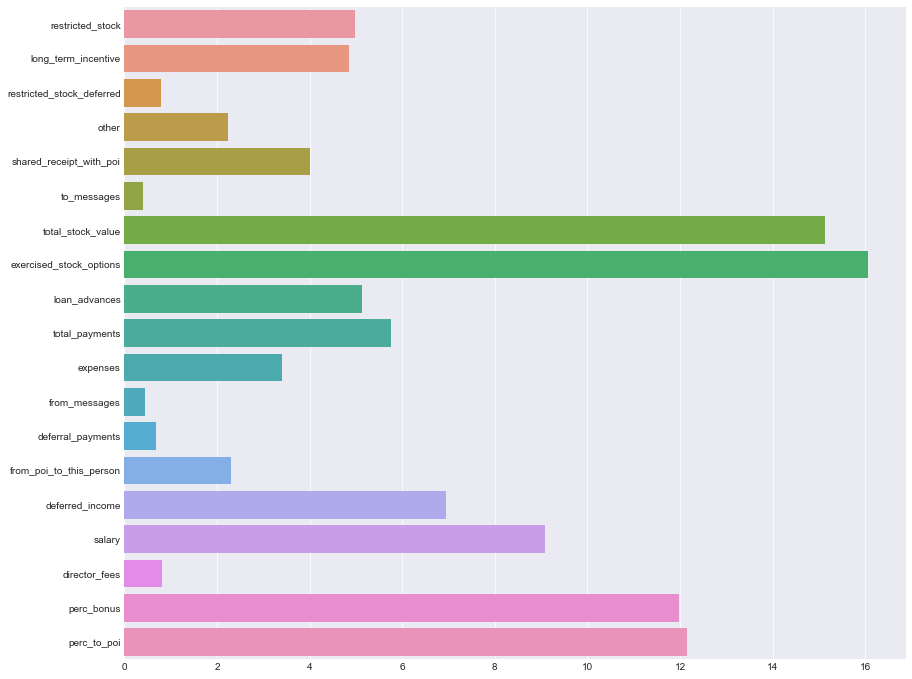

In [307]:
plot_importance(enrondata_df_tr)

By looking at the above graph I understood that 4 features are important. So I have removed the other features and saved the following features in a different data frame with_poi_enrondata_df.
* Total_stock_value
* exercised_stock_options
* perc_bonus
* perc_to_poi

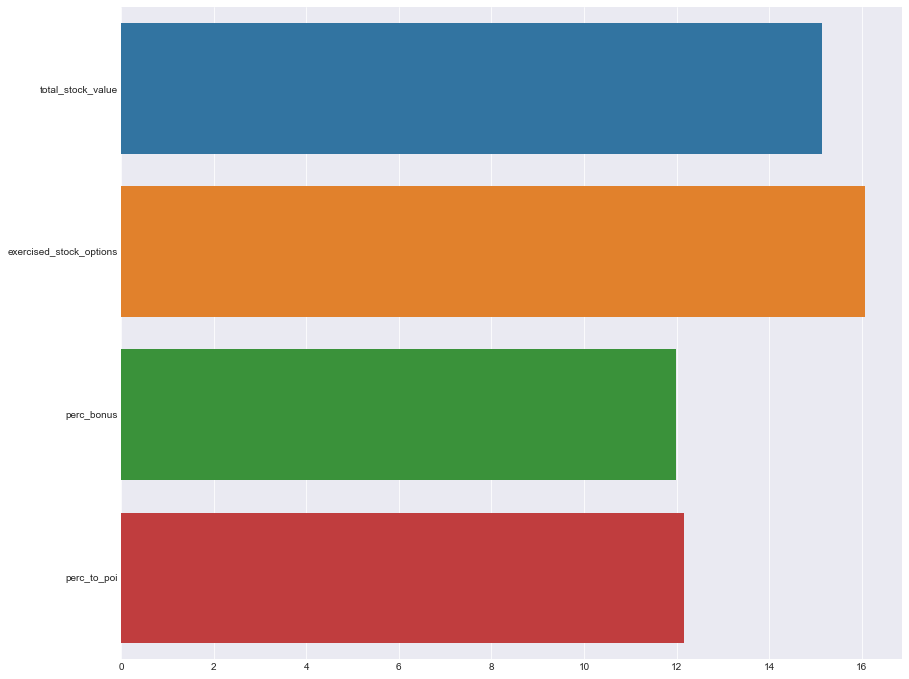

In [411]:
plot_importance(with_poi_enrondata_df)

In [414]:
four_imp_features_perc

['poi',
 'total_stock_value',
 'exercised_stock_options',
 'perc_bonus',
 'perc_to_poi']

Using SelectPercentile I have taken all 20 features into consideration and documented the process, scores in Ipynb file and below. Again I have used SelectKbest to find the best k value and then used GridSearch to find the best parameters.
The same process is applied to SelectPercentiles 4 important features also and scores are documented in Ipynb file and below.

Another method in Univariate feature selection is 

* SelectKBest selects the K features that are most powerful (where K is a parameter).
    * I have used SelectKbest to choose the features. I have tested with different k values(4, 8, 12, 16, 20) and selected top 4 features i.e k =4. Scores are documented in enronproject.ipynb.

After examining the scores of feature importances, SelectPercentile, graph and comparing the scores of SelectKbest at k = 4, 8, 12, 16, 20(all) features, I have selected the following features as final features.

###### final features at k =4 using  SelectKbest method (kbest_features_list)

['poi',
 'exercised_stock_options',
 'total_stock_value',
 'perc_to_poi',
 'perc_bonus']
 
Before I trained and evaluated the model, I thought the automatic approach should be better than the manual approach. The improving F1 score proved that I am correct. So I chose the kbest features list as the final features list.

###### Scaling:

* In this project, I have used GridSearchCV in combination with SelectKBest, StandardScaler() for SVM model and Kneighbors. 

* I also used GridSearchCV in combination with PCA, StandardScaler() for Logistic Regression.

* And for remaining models used GridSearchCV in combination with SelectKBest as the algorithms doesn't require feature scaling.

I  have used Pipeline to combine the feature scaling process and the model training process.

###### Naive Bayes(NB):

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods. Which can be extremely fast relative to other classification algorithms.

###### Scaling:
It has feature scaling by design. So no need to scale our features.

In [854]:
print(gnb_grid.best_params_)

{}


##### GaussianNB:
###### original(old_features_list)
Accuracy: 0.75553	Precision: 0.23379	Recall: 0.36600	F1: 0.28532	F2: 0.32881
###### selected_features_list(after adding new features)
Accuracy: 0.78900	Precision: 0.37292	Recall: 0.23550	F1: 0.28869	F2: 0.25424
###### Kbest features(All 20 features)
Accuracy: 0.78900	Precision: 0.37292	Recall: 0.23550	F1: 0.28869	F2: 0.25424 
###### Kbest features(k=12) Grid serach
Accuracy: 0.80536	Precision: 0.44968	Recall: 0.31500	F1: 0.37048	F2: 0.33507
###### Select percentile(20 features)Importances
Accuracy: 0.71555	Precision: 0.28146	Recall: 0.36350	F1: 0.31726	F2: 0.34348
###### Select percentile(k=18) GridSeach
Accuracy: 0.72191	Precision: 0.28726	Recall: 0.35750	F1: 0.31856	F2: 0.34083
###### four_imp_features_perc
Accuracy: 0.82336	Precision: 0.52608	Recall: 0.28750	F1: 0.37181	F2: 0.31618
###### four_imp_features_perc using Gridsearch
Accuracy: 0.82336	Precision: 0.52608	Recall: 0.28750	F1: 0.37181	F2: 0.31618
###### Kbest scores at k =4
Accuracy: 0.82336	Precision: 0.52608	Recall: 0.28750	F1: 0.37181	F2: 0.31618
###### Kbest scores at k =8
Accuracy: 0.82182	Precision: 0.51757	Recall: 0.29450	F1: 0.37540	F2: 0.32228
###### Kbest scores at k = 12
Accuracy: 0.79982	Precision: 0.42243	Recall: 0.27500	F1: 0.33313	F2: 0.29564
###### Kbest scores at k = 16
Accuracy: 0.79236	Precision: 0.38836	Recall: 0.24700	F1: 0.30196	F2: 0.26639

Using SelectKbest at k = 8 got a better score of F1: 0.37540. It's nearly satisfying recall. So far this is the best score.

###### Support Vector Machine (SVM) 

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is the number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyperplane that differentiates the two classes very well

###### Scaling:
It needs feature scaling.

A lot of the features have vastly different scales. Examples are salary and emails. Salary range from 5000 $  up to million dollars or even above.
Email features may be around hundreds to thousands in a particular time period. As I have created new features to make sure the scales are comparable, I'm going to run sklearn's Standard scaler over SVM.

###### Support Vector
###### original(old_features_list)
Accuracy: 0.74153	Precision: 0.25880	Recall: 0.50350	F1: 0.34188	F2: 0.42343
###### selected_features_list(after adding new features)
Accuracy: 0.70373	Precision: 0.28330	Recall: 0.41150	F1: 0.33558	F2: 0.37735

After adding new features the score of F1 got decreased a little bit. So old or original features performed better. But Precision is below 0.3. Let's check SelectPercentile scores

###### Select percentile(20 features)Importances
Accuracy: 0.66055	Precision: 0.23567	Recall: 0.38650	F1: 0.29280	F2: 0.34264
###### Select percentile(k=5) GridSeach
Accuracy: 0.71800	Precision: 0.35523	Recall: 0.67600	F1: 0.46573	F2: 0.57259
###### four_imp_features_perc
Accuracy: 0.74609	Precision: 0.40100	Recall: 0.80300	F1: 0.53489	F2: 0.66889
###### four_imp_features_perc using Gridsearch
Accuracy: 0.74609	Precision: 0.40100	Recall: 0.80300	F1: 0.53489	F2: 0.66889

The best score is 	F1: 0.53489 . This was achieved using 4 most important features of Select Percentile.
Precision and recall are also good.

Let's look at SelectKbest scores:
###### Kbest features(All 20 features)
Accuracy: 0.70373	Precision: 0.28330	Recall: 0.41150	F1: 0.33558	F2: 0.37735
###### Kbest features(At k =16)
Accuracy: 0.66745	Precision: 0.31900	Recall: 0.73050	F1: 0.44407	F2: 0.58068
###### Kbest scores at k =4
Accuracy: 0.74609	Precision: 0.40100	Recall: 0.80300	F1: 0.53489	F2: 0.66889
###### Kbest scores at k =8
Accuracy: 0.74745	Precision: 0.39731	Recall: 0.75250	F1: 0.52004	F2: 0.63836
###### Kbest scores at k =12
Accuracy: 0.64309	Precision: 0.29092	Recall: 0.67000	F1: 0.40569	F2: 0.53149
###### Kbest scores at k = 16
Accuracy: 0.67382	Precision: 0.32762	Recall: 0.75450	F1: 0.45686	F2: 0.59852

Best F1 score of 0.53489 is achieved by SelectKbest at k = 4, Which is also same as SelectPercentile.

###### Decision Tree Classifier(DT)

The decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter/differentiator in input variables.

###### Scaling:
Decision tree doesn't require feature scaling.

##### Decision tree
###### original(old_features_list)
Accuracy: 0.79787	Precision: 0.22553	Recall: 0.21200	F1: 0.21856	F2: 0.21457
###### selected_features_list(after adding new features)
Accuracy: 0.73118	Precision: 0.26556	Recall: 0.27100	F1: 0.26825	F2: 0.26989

After adding new features score improved from F1: 0.21856 to F1: 0.26825.

###### Tree importances SelectKBest with k =8  before parameter tuning
Accuracy: 0.72855	Precision: 0.25201	Recall: 0.25050	F1: 0.25125	F2: 0.25080
###### Tree importances SelectKBest with k = 8 parameter tuning
Accuracy: 0.72809	Precision: 0.36546	Recall: 0.67300	F1: 0.47369	F2: 0.57605
###### k = 8 after parameter tuning with old features i.e without new features
Accuracy: 0.59882	Precision: 0.21157	Recall: 0.44250	F1: 0.28627	F2: 0.36321

##### Importances conclusion
We can say that score is improved for importances at k =8 after parameter tuning.  As the score is F1: 0.47369. And precison and recall are also above 0.3. So we can say that it's a better score.

###### Select percentile(20 features)
Accuracy: 0.74182	Precision: 0.29512	Recall: 0.30250	F1: 0.29877	F2: 0.30100
###### Select percentile(k=9) GridSeach
Accuracy: 0.68582	Precision: 0.30388	Recall: 0.56400	F1: 0.39496	F2: 0.48156
###### four_imp_features_perc
Accuracy: 0.77464	Precision: 0.37075	Recall: 0.34350	F1: 0.35661	F2: 0.34862
###### four_imp_features_perc using Gridsearch
Accuracy: 0.69545	Precision: 0.31638	Recall: 0.58150	F1: 0.40980	F2: 0.49803

After using the SelectPercentiles 4 important features with Gridsearch got a score of 0.40980. Which is not the best score. As we already got a score of  0.47369 at k =8 from importances.

###### Kbest features(All 20 features)
Accuracy: 0.73482	Precision: 0.27601	Recall: 0.28250	F1: 0.27922	F2: 0.28118
###### Kbest features(At k =17)Gridsearch
Accuracy: 0.73118	Precision: 0.36872	Recall: 0.67200	F1: 0.47617	F2: 0.57707
###### Kbest scores at k =4
Accuracy: 0.76045	Precision: 0.40161	Recall: 0.64800	F1: 0.49589	F2: 0.57718
###### Kbest scores at k = 8
Accuracy: 0.67664	Precision: 0.30961	Recall: 0.63300	F1: 0.41583	F2: 0.52362
###### Kbest scores at k = 12
Accuracy: 0.65064	Precision: 0.29222	Recall: 0.64800	F1: 0.40280	F2: 0.52111
###### Kbest scores at k = 16
Accuracy: 0.63309	Precision: 0.28550	Recall: 0.67750	F1: 0.40172	F2: 0.53154

##### Kbest features conclusion
After comparing the scores of importances, SelectPercentile, Kbest, we can say that using SelectKbest at k =4 we got a better score of F1: 0.49589. Precision and recall are also above 0.3

###### Logistic Regression(LR)

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. To represent the binary / categorical outcome, we use dummy variables. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as a dependent variable. In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function.

###### Scaling:
No (unless regularized).

penalty : str, ‘l1’ or ‘l2’, default: ‘l2’. Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.

tol : float, default: 1e-4. Tolerance for stopping criteria.

class_weight : dict or ‘balanced’, default: None. Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

random_state : int, RandomState instance or None, optional, default: None
The seed of the pseudo random number generator to use when shuffling the data. 

######  Logistic Regression
###### original(old_features_list)
Accuracy: 0.78180	Precision: 0.18063	Recall: 0.18000	F1: 0.18032	F2: 0.18013
###### selected_features_list(after adding new features)
Accuracy: 0.71845	Precision: 0.22143	Recall: 0.21800	F1: 0.21970	F2: 0.21868

After creating new features score improved from F1: 0.18032 to F1: 0.21970.
But precision and recall are below 0.3

###### Select percentile(20 features)Importances
Accuracy: 0.77127	Precision: 0.31492	Recall: 0.21950	F1: 0.25869	F2: 0.23366
###### Select percentile(k=11) GridSeach
Accuracy: 0.79909	Precision: 0.38636	Recall: 0.17850	F1: 0.24419	F2: 0.20002
###### four_imp_features_perc
Accuracy: 0.62173	Precision: 0.12651	Recall: 0.18300	F1: 0.14960	F2: 0.16800
###### four_imp_features_perc using Gridsearch
Accuracy: 0.85600	Precision: 0.81138	Recall: 0.27100	F1: 0.40630	F2: 0.31264

Using the SelectPercentiles 4 important features using GridSearch fot a score of F1: 0.40630. But recall is below 0.3. As above methods are not giving a satisfying score. Let's look at the Kbest scores.

###### Kbest features(All 20 features)
Accuracy: 0.71927	Precision: 0.22273	Recall: 0.21850	F1: 0.22060	F2: 0.21933
###### Kbest features(At k =8)(Gridsearch)
Accuracy: 0.81618	Precision: 0.48770	Recall: 0.21800	F1: 0.30131	F2: 0.24511
###### Kbest scores at k =4
Accuracy: 0.85600	Precision: 0.81138	Recall: 0.27100	F1: 0.40630	F2: 0.31264
###### Kbest scores at k =8
Accuracy: 0.83364	Precision: 0.61364	Recall: 0.22950	F1: 0.33406	F2: 0.26235
###### Kbest scores at k = 12
Accuracy: 0.84073	Precision: 0.68731	Recall: 0.22750	F1: 0.34185	F2: 0.26264
###### Kbest scores at k = 16
Accuracy: 0.82073	Precision: 0.53271	Recall: 0.11400	F1: 0.18781	F2: 0.13526

Using SelectKbest at k =4, I got a score of F1: 0.40630. But still recall is below 0.3. So far this is the best score.

###### KNN

It can be used for both classification and regression problems. However, it is more widely used in classification problems in the industry. K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors. The case is assigned to the class is most common amongst its K nearest neighbors measured by a distance function.
These distance functions can be Euclidean, Manhattan, Minkowski and Hamming distance. First three functions are used for continuous function and the fourth one (Hamming) for categorical variables. If K = 1, then the case is simply assigned to the class of its nearest neighbor. At times, choosing K turns out to be a challenge while performing kNN modeling.

###### Scaling:
This algorithm measures the distances between pairs of samples. So we have to scale the features.

A lot of the features have vastly different scales. Examples are salary and emails. Salary range from 5000 $  up to million dollars or even above.
Email features may be around hundreds to thousands in a particular time period. As I have created new features to make sure the scales are comparable, I'm going to run sklearn's Standard scaler over KNN.

n_neighbors : int, optional (default = 5) .Number of neighbors to use by default for kneighbors queries.

weights : str or callable, optional (default = ‘uniform’). Weight function used in prediction. Possible values:‘uniform’, ‘distance’

algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional

Algorithm used to compute the nearest neighbors: 'ball_tree’, 'kd_tree’ 

leaf_size : int, optional (default = 30).Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

p : integer, optional (default = 2). Power parameter for the Minkowski metric.

n_jobs : int, optional (default = 1). The number of parallel jobs to run for neighbors search.

#### KNeighborsClassifier
###### original(old_features_list)
Accuracy: 0.87873	Precision: 0.64812	Recall: 0.19800	F1: 0.30333	F2: 0.22994
###### selected_features_list(after adding new features)
Accuracy: 0.83636	Precision: 0.66949	Recall: 0.19750	F1: 0.30502	F2: 0.22992

After creating the new features score improved very little. Precision and recall are very low. 

###### Select percentile(20 features)Importances
Accuracy: 0.84873	Precision: 0.80996	Recall: 0.21950	F1: 0.34540	F2: 0.25697
###### Select percentile(k=6) GridSeach
Accuracy: 0.76309	Precision: 0.30895	Recall: 0.24500	F1: 0.27328	F2: 0.25558
###### four_imp_features_perc
Accuracy: 0.84436	Precision: 0.73762	Recall: 0.22350	F1: 0.34305	F2: 0.25970
###### four_imp_features_perc using Gridsearch
Accuracy: 0.83255	Precision: 0.54736	Recall: 0.45650	F1: 0.49782	F2: 0.47218

Using SelecPercentiles 4 important features with GridSearch got a score of F1: 0.49782. Which is better. Both precision and recall are above 0.3

###### Kbest features(All 20 features)
Accuracy: 0.83636	Precision: 0.66949	Recall: 0.19750	F1: 0.30502	F2: 0.22992
###### Kbest features(At k = 20)Grid search
Accuracy: 0.80636	Precision: 0.45844	Recall: 0.35850	F1: 0.40236	F2: 0.37484
###### Kbest scores at k =4
Accuracy: 0.83255	Precision: 0.54736	Recall: 0.45650	F1: 0.49782	F2: 0.47218
###### Kbest scores at k =8
Accuracy: 0.74391	Precision: 0.22965	Recall: 0.17350	F1: 0.19766	F2: 0.18242
###### Kbest scores at k = 12
Accuracy: 0.76436	Precision: 0.33574	Recall: 0.30250	F1: 0.31825	F2: 0.30861
###### Kbest scores at k = 16
Accuracy: 0.77355	Precision: 0.35238	Recall: 0.29300	F1: 0.31996	F2: 0.30322

Using Selectkbest at k =4 got a score of F1: 0.49782, which is same as SelecPercentiles 4 important features. This is so far the best score.

###### Adaboost

It fits a sequence of weak learners on different weighted training data. It starts by predicting the original data set and gives equal weight to each observation. If the prediction is incorrect using the first learner, then it gives higher weight to an observation which has been predicted incorrectly. Being an iterative process, it continues to add the learner(s) until a limit is reached in the number of models or accuracy.
Mostly, we use decision stamps with AdaBoost. But, we can use any machine learning algorithms as the base learner if it accepts weight on training data set. We can use AdaBoost algorithms for both classification and regression problem.

###### Scaling:

No feature scaling

The most important parameters are base_estimator, n_estimators, and learning_rate.

base_estimator : object, optional (default=DecisionTreeClassifier). The base estimator from which the boosted ensemble is built.

n_estimators : integer, optional (default=50). The maximum number of estimators at which boosting is terminated.

learning_rate : float, optional (default=1.). Learning rate shrinks the contribution of each classifier by learning_rate.

algorithm : {‘SAMME’, ‘SAMME.R’}, optional (default=’SAMME.R’)

random_state : int, RandomState instance or None, optional (default=None)

##### AdaBoostClassifier:
###### original(old_features_list)
Accuracy: 0.84433	Precision: 0.39145	Recall: 0.30200	F1: 0.34095	F2: 0.31646
###### selected_features_list(after adding new features)
Accuracy: 0.77945	Precision: 0.36223	Recall: 0.28000	F1: 0.31585	F2: 0.29332

After creating new features score decreased. So I can say that old or original features got a better score. Precision and recall are also above 0.3

###### Importances SelectKBest with k = 9
Accuracy: 0.76473	Precision: 0.32374	Recall: 0.27000	F1: 0.29444	F2: 0.27927
###### Importances SelectKBest with k = 9 after parameter tuning
Accuracy: 0.39282	Precision: 0.21270	Recall: 0.86600	F1: 0.34152	F2: 0.53646
###### k = 9 after parameter tuning with old features i.e without new features
Accuracy: 0.42718	Precision: 0.22169	Recall: 0.85650	F1: 0.35222	F2: 0.54460

The original set or old set  score is F1: 0.35222 with tuned parameters. For the newly created features set at k = 9 score is F1: 0.34152. which is not better.
But it's not satisfying  Udacitys minimum score of 0.3 for precision. As we got a score of precision = 0.212. We can say that performance is decreased after creating new features. Original or old features list is  satisfying the requirement of Udacity.

###### Select percentile(20 features)Importances
Accuracy: 0.78755	Precision: 0.39567	Recall: 0.31950	F1: 0.35353	F2: 0.33229
###### Select percentile(k=19) GridSeach
Accuracy: 0.60873	Precision: 0.26296	Recall: 0.63900	F1: 0.37259	F2: 0.49689
###### four_imp_features_perc
Accuracy: 0.76455	Precision: 0.33143	Recall: 0.29000	F1: 0.30933	F2: 0.29744
###### four_imp_features_perc using Gridsearch
Accuracy: 0.30391	Precision: 0.17796	Recall: 0.78150	F1: 0.28990	F2: 0.46565

Using SelectPercentile at k = 19 we got a score of F1: 0.37259. which is better than importances score. But recall is less than 0.3. As of now it is not satisfying the requirement of Udacity.

###### Kbest features(All 20 features)
Accuracy: 0.77900	Precision: 0.36070	Recall: 0.27900	F1: 0.31463	F2: 0.29224
###### Kbest features(At k =19)Grid search
Accuracy: 0.81264	Precision: 0.47355	Recall: 0.27300	F1: 0.34634	F2: 0.29826
###### Kbest scores at k =4
Accuracy: 0.74173	Precision: 0.33516	Recall: 0.42750	F1: 0.37574	F2: 0.40517
###### Kbest scores at k =8
Accuracy: 0.65691	Precision: 0.23347	Recall: 0.38850	F1: 0.29167	F2: 0.34296
###### Kbest scores at k = 12
Accuracy: 0.60573	Precision: 0.21437	Recall: 0.43850	F1: 0.28797	F2: 0.36267
###### Kbest scores at k = 16
Accuracy: 0.48682	Precision: 0.23583	Recall: 0.81350	F1: 0.36566	F2: 0.54601

Using SelectKbest at k = 4, we got a score of F1: 0.37574. But precision and recall greater than 0.3. As of now it's the best score.


###### Random Forest

Random Forest is a trademark term for an ensemble of decision trees. In Random Forest, we have the collection of decision trees (so known as “Forest”). To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest).

###### Feature scaling:
Random Forest does not require feature scaling.

n_estimators : integer, optional (default=10). The number of trees in the forest.

criterion : string, optional (default=”gini”). The function to measure the quality of a split.
max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

max_depth : integer or None, optional (default=None)The maximum depth of the tree.

min_samples_split : int, float, optional (default=2)The minimum number of samples required to split an internal node

n_samples_split as the minimum number.If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split. Changed in version 0.18: Added float values for percentages.

min_samples_leaf : int, float, optional (default=1).The minimum number of samples required to be at a leaf node:

##### RandomForestClassifier
###### original(old_features_list)
Accuracy: 0.85580	Precision: 0.37818	Recall: 0.12650	F1: 0.18958	F2: 0.14592
###### selected_features_list(after adding new features)
Accuracy: 0.80836	Precision: 0.41589	Recall: 0.13350	F1: 0.20212	F2: 0.15448

After creating new features we got a score of F1: 0.20212. That means it improved a little bit. But recall and F1 score are not satisfying Udacitys requirement of greater than 0.3. 

###### Importances SelectKBest with k = 9 before parameter tuning
Accuracy: 0.80627	Precision: 0.42303	Recall: 0.18000	F1: 0.25254	F2: 0.20337
###### Importances SelectKBest with k = 9 after parameter tuning
Accuracy: 0.78936	Precision: 0.34774	Recall: 0.18100	F1: 0.23808	F2: 0.20020
###### k =9 after parameter tuning with old features i.e without new features
Accuracy: 0.78027	Precision: 0.27843	Recall: 0.13100	F1: 0.17817	F2: 0.14652

Importances SelectKBest with k = 9 before parameter tuning got a score of F1: 0.25254. Precision and recall are also not greater than 0.3. This score is not satisfying the requirement of Udcaity.

###### Select percentile(20 features)Importances
Accuracy: 0.81073	Precision: 0.44109	Recall: 0.15350	F1: 0.22774	F2: 0.17652
###### Select percentile(k=9) GridSeach
Accuracy: 0.80336	Precision: 0.41265	Recall: 0.19250	F1: 0.26253	F2: 0.21549
###### four_imp_features_perc
Accuracy: 0.82227	Precision: 0.52252	Recall: 0.26100	F1: 0.34812	F2: 0.29003
###### four_imp_features_perc using Gridsearch
Accuracy: 0.80964	Precision: 0.46434	Recall: 0.30600	F1: 0.36890	F2: 0.32840

SelectPercentiles 4 important features using GridSearch got a score of F1: 0.36890. Precision and Recall are also greater than 0.3. So far this isthe best score.

###### Kbest features(All 20 features)
Accuracy: 0.80482	Precision: 0.38710	Recall: 0.12600	F1: 0.19012	F2: 0.14565
###### Kbest features(At k =6)Grid search
Accuracy: 0.80518	Precision: 0.42203	Recall: 0.19350	F1: 0.26534	F2: 0.21700
###### Kbest scores at k =4
Accuracy: 0.81882	Precision: 0.50290	Recall: 0.30300	F1: 0.37816	F2: 0.32917
###### Kbest scores at k =8
Accuracy: 0.81045	Precision: 0.46017	Recall: 0.24550	F1: 0.32018	F2: 0.27076
###### Kbest scores at k = 12
Accuracy: 0.79009	Precision: 0.33856	Recall: 0.16200	F1: 0.21914	F2: 0.18086
###### Kbest scores at k = 16
Accuracy: 0.80845	Precision: 0.43185	Recall: 0.16950	F1: 0.24345	F2: 0.19294

SelectKbest score at k = 4 got a score of F1: 0.37816. Precision and recall are also greater than 0.3. So far this is the best score

###### Best scores from above for GNB
###### Kbest scores at k =8
Accuracy: 0.82182	Precision: 0.51757	Recall: 0.29450	F1: 0.37540	F2: 0.32228


###### Best scores from above for SVM
###### four_imp_features_perc
Accuracy: 0.74609	Precision: 0.40100	Recall: 0.80300	F1: 0.53489	F2: 0.66889
###### four_imp_features_perc using Gridsearch
Accuracy: 0.74609	Precision: 0.40100	Recall: 0.80300	F1: 0.53489	F2: 0.66889

###### Kbest scores at k =4
Accuracy: 0.74609	Precision: 0.40100	Recall: 0.80300	F1: 0.53489	F2: 0.66889
###### Best Parameters
{'classifier__degree': 1, 'classifier__class_weight': 'balanced', 'classifier__kernel': 'rbf', 'classifier__C': 1}

###### Best scores from above for Decision Tree:
###### Kbest scores at k =4
Accuracy: 0.76045	Precision: 0.40161	Recall: 0.64800	F1: 0.49589	F2: 0.57718
###### Best  Parameters
{'classifier__min_samples_split': 9, 'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__splitter': 'best', 'classifier__min_samples_leaf': 3}

###### Best scores from above for Logistic Reg
###### four_imp_features_perc using Gridsearch
Accuracy: 0.85600	Precision: 0.81138	Recall: 0.27100	F1: 0.40630	F2: 0.31264
###### Best Parameters:
{'classifier__penalty': 'l2', 'reducer__n_components': 1, 'reducer__whiten': False, 'reducer__svd_solver': 'auto'}
###### Kbest scores at k =4
Accuracy: 0.85600	Precision: 0.81138	Recall: 0.27100	F1: 0.40630	F2: 0.31264
###### Best Parameters
{'classifier__penalty': 'l2', 'reducer__n_components': 1, 'reducer__whiten': False}

###### Best scores from above for Kneighbors
###### four_imp_features_perc using Gridsearch
Accuracy: 0.83255	Precision: 0.54736	Recall: 0.45650	F1: 0.49782	F2: 0.47218
###### Parameters
###### Kbest scores at k =4
Accuracy: 0.83255	Precision: 0.54736	Recall: 0.45650	F1: 0.49782	F2: 0.47218
###### Parameters
{'classifier__leaf_size': 1, 'classifier__n_neighbors': 1, 'reducer__n_components': 2, 'reducer__whiten': False}

###### Best scores from above for Adaboost
###### Kbest scores at k =4 gave the best performance
Accuracy: 0.74173	Precision: 0.33516	Recall: 0.42750	F1: 0.37574	F2: 0.40517
###### Best Parameters
{'classifier__learning_rate': 2.2, 'classifier__n_estimators': 15, 'classifier__algorithm': 'SAMME'}


###### Best scores from above for RandomForest
###### Kbest scores at k =4 gave the best  performance
Accuracy: 0.81882	Precision: 0.50290	Recall: 0.30300	F1: 0.37816	F2: 0.32917
###### Best parameters:
{'classifier__min_samples_split': 5, 'classifier__n_estimators': 8, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1}


According to F1 scores ranking

* First
    * SVC
* Second
    * Kneighbors
* Third
    * Decision Tree


###### 3. What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]

###### Ans:

After evaluating the output of the classifiers above, I chose SVC Classifier for k = 4. Because it had the best-considered metric of F1 score.

I think that it can further be tuned to get a better accuracy using different strategies. I also tried a variety of the other models, including Decision Tree, Kneighbors, Random Forest etc.

Among these models, the best performance was achieved by SVC.

The rank in the table is based on the F1 Score, which is a balanced metric of both precision and recall score.

###### 4.What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]


###### Ans:

Tuning the parameters of an algorithm is a very important step in machine learning project. Tuning the parameters means to adjust the parameters of the classifier in order to give the best performance. Classifiers have parameters which affect the performance of the model. Parameters are passed as arguments to the constructor of the estimator class. Many learning algorithms require users to input parameters before training the model. If the hyper-parameters are not set up properly, even the most suitable algorithm may have a bad performance. An example of the parameters for the K-nearest neighbor would be the number of neighbors. 

We can either try a lot of hyper-parameters set manually, or we can use some automatically parameters tuning strategies, such as GridSearchCV() and RandomizedSearchCV().

So simply parameter tuning is the process of systematically searching for the best parameters by some predefined metrics. The formal definition of GridSearchCV is a way of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.

I have used Pipeline function, where parameters tuning is done using GridSearchCV and StratifiedShuffleSplit. Following parameters are used to tune the algorithms:

1. SelectKBest: k(for all except Naive Bayes)

2. Principal Components Analysis (PCA):

* Logistic Regression
    * n_components, whiten
* Kneighbors
    * n_components, whiten

3. Logistic Regression: penalty

4. Support Vector Classifier: C, gamma, kernel, degree

5. Decision Tree: min_samples_split, min_samples_leaf, criterion, class_weight, splitter

6. Random Forest: n_estimators, min_samples_leaf, max_features, min_samples_split

7. KNeighbors: n_neighbors, leaf_size

8. Adaboost: learning_rate, n_estimators, algorithm

Best parameters for SVC:
{'classifier__class_weight': 'balanced', 'classifier__C': 1, 'classifier__degree': 1, 'classifier__kernel': 'rbf'}

Best parameters for KNN:
{'classifier__leaf_size': 1, 'classifier__n_neighbors': 1, 'reducer__n_components': 2, 'reducer__whiten': False} 

Best parameters for decision tree:
{'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 9, 'classifier__splitter': 'best'}


###### Feature scaling:
It can vary your results a lot  for some algorithms and have a minimal or no effect in others. 

Why Scaling:

Most of the times, your dataset will contain features highly varying in magnitudes, units, and range. But since most of the machine learning algorithms use the Euclidean distance between two data points in their computations, this is a problem.

If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg, and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

There are four common methods to perform Feature Scaling.

* Standardisation:
    * Standardisation replaces the values with their Z scores.
* Mean Normalisation:
    * This distribution will have values between -1 and 1 with μ=0.
* Min-Max Scaling:
    * This scaling brings the value between 0 and 1.
* Unit Vector:
    * Scaling is done considering the whole feature vector to be of unit length.

###### When to Scale:
* Rule of thumb to follow here is an algorithm that computes distance or assumes normality, scales your features!!!

* Some examples of algorithms where feature scaling matters are:
    * K-nearest neighbors with a Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally.
* Scaling is critical while performing Principal Component Analysis(PCA).
* PCA tries to get the features with maximum variance and the variance is high for high magnitude features. This skews the PCA towards high magnitude features.
* Tree-based models are not distance based models and can handle varying ranges of features. Hence, Scaling is not required while modeling trees.
* While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. 


###### 5.What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]

##### Ans:

*  Validation is the process of evaluating the algorithm using a test set that has not been seen by the learning algorithm during training.
* Classic mistake one can make is using the training data for testing the model.
* First, separate the dataset into training data and testing data.
* It is important to test the model with a different dataset or split the data into different parts one for training and one for testing.
* Because if an algorithm learns and tests on the same data, then the model might repeat the target labels and likely there is a chance of getting a perfect score.

Sklearn has several helper functions under Cross-validation. I have used StratifiedShuffleSplit for this project. As it is suitable for this dataset. We know that there is an imbalance in the number of POIs and Non-POIs. The StratifiedShuffleSplit ensures that the percentage of target labels is approximately the same in both training and validation sets as it is in the complete dataset.

Validation importance: validation provides an assessment of the model's true generalization ability. A model that cannot generalize beyond the training dataset is of little use to solving real-world problems. Cross-validation helps to use all the data for training and all the data for testing so that I don't have to balance the split between training and test set. Here stratified shuffle split cross-validation is used due to the small dataset.

###### 6. Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

###### Ans:

For this project, the objective was a precision and a recall both greater than 0.3. 

I have used precision score, recall score,  F1 score, F2 score as the evaluation metrics. 

Precision Score: number of true positives/ (number of true positives + number of false positives)

A high precision means POIs identified by an algorithm tended to be correct.

i.e precision measures how many predicted POIs are actually POIs.

Recall Score: number of true positives/ (number of true positives + number of false negatives)

A high recall means if there are POIs in the dataset, an algorithm has a good chance to identify them.

Here recall measures how many POIs are successfully predicted. 

F1-Score: (2recallprecision) / (recall + precision)

 The F1 score is the harmonic mean of precision and recall. It's a more comprehensive metric because it balances the power between precision and recall.

F2-Score: (5recallprecision) / (4*precision + recall).

Generally, we want to build a model which has higher ratios for both “Precision Score” and “Recall Score”, but unfortunately in most cases, we have to trade off between these two metrics. So in order to evaluate the model using just one metric, we can use the harmonic mean of the “Precision Score” and “Recall Score” which is called “F1 Score”:


I have tried to increase the F1 score of each algorithm. But my final selection is the SVC model. As the F1 score is better. Next best is Kneighbors, It's F1 score is also very near to the Decision Tree score. 

The average performance of these metrics was:

###### Best scores from above for SVC
###### Kbest scores at k =4 with tuned parameters
Accuracy: 0.74609	Precision: 0.40100	Recall: 0.80300	F1: 0.53489	F2: 0.66889
###### Best Parameters 
{'classifier__degree': 1, 'classifier__class_weight': 'balanced', 'classifier__kernel': 'rbf', 'classifier__C': 1}
###### old_features_list with tuned parameters
Accuracy: 0.66627	Precision: 0.26094	Recall: 0.45600	F1: 0.33194	F2: 0.39669

###### Best scores from above for Kneighbors
###### Kbest scores at k =4 with tuned parameters
Accuracy: 0.83255	Precision: 0.54736	Recall: 0.45650	F1: 0.49782	F2: 0.47218
###### Parameters
{'classifier__leaf_size': 1, 'classifier__n_neighbors': 1, 'reducer__n_components': 2, 'reducer__whiten': False}
###### old_features_list with tuned parameters
Accuracy: 0.74564	Precision: 0.24747	Recall: 0.19550	F1: 0.21844	F2: 0.20407

###### Best scores from above for Decision Tree:
###### Kbest scores at k =4 with tuned parameters
Accuracy: 0.76045	Precision: 0.40161	Recall: 0.64800	F1: 0.49589	F2: 0.57718
###### Best  Parameters
{'classifier__min_samples_split': 9, 'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__splitter': 'best', 'classifier__min_samples_leaf': 3}
###### old_features_list with tuned parameters
Accuracy: 0.67818	Precision: 0.22695	Recall: 0.32000	F1: 0.26556	F2: 0.29575

From the above scores we can say that kbest_features_list performance at k = 4 is better, when compared to original features.

In the above table:
First Best:  SVC Classifier gives the highest F1 score.
Second Best: Kneighbors Classifier
Third Best: Decision Tree 

SVC:  

Accuracy: 0.74609	Precision: 0.40100	Recall: 0.80300	F1: 0.53489	F2: 0.66889

A precision score of 0.401 means that the individuals labeled by my model as persons of interest, 40.1 % of them were actually persons of interest. A recall score of 0.803 means that my model identified 80.3 % of persons of interest present in the entire dataset. That means only 19.7% of Pois go undetected.

A better recall score can be achieved. But when comparing all recall scores and F1 scores of classifiers, SVC Classifier got better scores.


How to improve the score:

It can be improved by:
* Collecting high-quality data.
* Exploration of data and cleaning outliers in a better way.
* Create additional features.
* Using different scaling options.
* Analyzing the text in the emails. We have learned basics of the text learning in the mini-project provided by Udacity.

When tester.py is used to evaluate performance, precision and recall are both at least 0.3

* Yes for SVC all are above .3
* And also for Kneighbors classifier, Decision Tree

###### References:

* Dylan Lennard (Udacity Mentor)

https://chrisalbon.com/machine_learning/model_selection/pipelines_with_parameter_optimization/


https://stackoverflow.com/questions/43366561/use-sklearns-gridsearchcv-with-a-pipeline-preprocessing-just-once/43366811

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn

https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/

https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/

https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

https://discuss.analyticsvidhya.com/t/scaling-and-standardizing-is-a-confusing-choice/19042

https://stats.stackexchange.com/questions/121886/when-should-i-apply-feature-scaling-for-my-data

https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e


http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

https://www.datacamp.com/community/blog/scikit-learn-cheat-sheet

Stack Overflow

https://towardsdatascience.com/@williamkoehrsen